#  Assignment 1
You are given $n$ documents (labels $\in \{-1,+1\}$), each consisting of $n_i$ words from some finite vocabulary $\mathsf{V=\{v_1,v_2,\dots,v_d\}}$ with size $d$.
We represent document $i$ by a vector
$$
    \mathsf{\mathbf{x_i} = \begin{pmatrix} \mathsf{x_{i1}, x_{i2},\dots,x_{id},1 }\end{pmatrix}}
$$ where $x_{ij}=$ number of times that word $v_j$ appears in document $i$.
Now let matrix $X$ of size $n$ by $d+1$ where its $i$-th row is equal to $\mathbf{x_i}$; i.e.
$$
    \mathsf{X = \begin{pmatrix} \mathsf{x_{ij}} \end{pmatrix}_{i\in[n],j\in[d+1]}}
$$
also let vector $\mathbf{y} \in \{-1,+1\}^n$ be
$$
    \mathbf{y}=\begin{pmatrix} \mathsf{y_1 \\
                                   y_2 \\
                                   \dots \\
                                   y_n}
                                   \end{pmatrix}
$$
wher $y_i$ is the label of document $i$.
### Building $X$ and $\mathbf{y}$
You are given two text files
1. `train.txt`: training set (labeled documents)
2. `test.txt`: test set (unlabeled documents)

in `train.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{train}}$
- line $2i$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{train}}$)
- line $2i+1$ contain label for document $i$    ($i=1,2,\dots,n_{\mathrm{train}}$)

in `test.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{test}}$
- line $i+1$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{test}}$)

Now let's build $X_\mathrm{train}$,$X_\mathrm{test}$, and $\mathbf{y}_{\mathrm{train}}$ as defined above using `train.txt` and `test.txt`

### IMPORTANT
- Documents are numbered as they appear in the input file
- let Vocabulary $V=(v_1,v_2,\dots,v_d)$ be **sorted** list of all distinct word in the documents of **training** set.

In [47]:
import numpy as np

In [48]:
file_path = 'train.txt'
with open(file_path, 'r') as file:
    train_data = file.readlines()

file_path = 'test.txt'
with open(file_path, 'r') as file:
    test_data = file.readlines()

ACT1 = []
ACT3 = []
n = len(train_data)-1
for i in range(1,n+1):
    if i%2 ==0:
        ACT3.append(int(train_data[i].strip()))
    else:
        ACT1.append((train_data[i].strip()).split())

ACT2 = []
m = len(test_data)-1
for i in range(1,m+1):
    ACT2.append((test_data[i].strip()).split())

In [49]:
# (ACT1-3) using input files compute the following
docs_train = ACT1 #list of documents where each document is a list of words
docs_test = ACT2 #list of documents where each document is a list of words
labels = ACT3   #list of labels each either -1 or +1

n_train = len(docs_train)
n_test = len(docs_test)
print(docs_train[40])
print(docs_test[40])

#CHECKS
assert((n_train+n_test)==1500)
assert(np.sum(np.array(labels))== -348)
assert(len(docs_train[1])+len(docs_test[1])==12)

['WAcqG', 'Rv', 'zY#tE', 'tgU', 'tgU', 'tgU']
['LnGi', 'LnGi', 'dZJa', 'Rv', 'Rv', 'ITZM']


In [50]:
# (ACT4) design a function that takes list of documents (list of list of words)
# as input and returns sorted list of distinct words
# use built-in sort in python for sorting strings
def make_vocabulary(docs):
    vocabulary = set()
    for doc in docs:
        for word in doc:
            vocabulary.add(word)
    sorted_vocabulary = sorted(vocabulary)
    return sorted_vocabulary

vocab = make_vocabulary(docs_train)
d = len(vocab)
w2i = {vocab[i]:i for i in range(len(vocab))} # maps words in dictionary to corresponding index
print(vocab)
print(w2i)

#CHECKS
assert(vocab[2]=="LnGi")
assert(vocab == sorted(vocab))

['ITZM', 'JgwBu', 'LnGi', 'OnJECH', 'Rv', 'WAcqG', 'dZJa', 'iWgN', 'tgU', 'zY#tE']
{'ITZM': 0, 'JgwBu': 1, 'LnGi': 2, 'OnJECH': 3, 'Rv': 4, 'WAcqG': 5, 'dZJa': 6, 'iWgN': 7, 'tgU': 8, 'zY#tE': 9}


In [51]:
# docs_train

In [52]:
# (ACT5) design a function that takes
# (1) docs: list of documents (i.e. list of list of words)
# (2) w2i: a dictionary that maps words to index
# output numpy matrix X as described above with shape of (n,d+1) -- where d is size of vocabulary
# (DO NOT forget last column of X which is all 1)


def make_matrix(docs, w2i):
  n = len(docs)
  d = len(w2i)
  X = np.zeros((n,d+1))
  for i in range(n):
    for word in docs[i]:
      if word in w2i:
        X[i][w2i[word]] += 1
  X[:,d] = 1
  return X

X_train = make_matrix(docs_train,w2i)
X_test = make_matrix(docs_test,w2i)
y_train = np.array(labels)

# (ACT6-8)
print ("First 5 rows of X_train: ")
# print(ACT6)
print(X_train[:5])

print ("Last 5 rows of X_test: ")
# print(ACT7)
print(X_train[:5])

print ("First 10 labels of training set:")
# print (ACT8)
print(docs_train[:10])


#CHECKS
assert(np.sum(X_train)==6871)
assert(np.sum(X_test)==3462)
assert(np.sum(X_test[10,:]+X_train[10,:])==11)

First 5 rows of X_train: 
[[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
 [3. 0. 0. 0. 1. 0. 2. 0. 2. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 1. 3. 2. 1.]
 [1. 0. 0. 1. 2. 0. 2. 0. 1. 0. 1.]]
Last 5 rows of X_test: 
[[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
 [3. 0. 0. 0. 1. 0. 2. 0. 2. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 1. 3. 2. 1.]
 [1. 0. 0. 1. 2. 0. 2. 0. 1. 0. 1.]]
First 10 labels of training set:
[['Rv', 'tgU', 'zY#tE'], ['Rv', 'tgU', 'dZJa', 'dZJa', 'tgU', 'ITZM', 'ITZM', 'ITZM'], ['tgU', 'tgU'], ['tgU', 'zY#tE', 'tgU', 'WAcqG', 'tgU', 'ITZM', 'iWgN', 'JgwBu', 'zY#tE'], ['dZJa', 'Rv', 'OnJECH', 'tgU', 'Rv', 'dZJa', 'ITZM'], ['iWgN', 'iWgN', 'iWgN', 'zY#tE', 'tgU'], ['Rv', 'Rv', 'tgU', 'ITZM', 'tgU', 'tgU', 'LnGi'], ['JgwBu', 'Rv', 'Rv'], ['iWgN', 'Rv', 'zY#tE', 'ITZM', 'LnGi'], ['JgwBu', 'iWgN', 'OnJECH', 'WAcqG', 'LnGi']]


## Linear Predictor

Let $\mathbf{w} \in \mathbb{R}^{d+1}$, for a single document $\mathbf{x} \in \mathbb{R}^{d+1}$, our predicted label is
$$
    \mathsf{\hat{y} = \mathrm{sign}({\mathbf{w} \cdot \mathbf{y}})}
$$
where
$$
    \displaystyle  \mathrm{sign}(\alpha) = \begin{cases}
      +1 & \alpha \geq 0 \\
      -1 & \alpha < 0 \\
    \end{cases}
$$

Therefore, for documents matrix $X \in \mathbb{R}^{n\times(d+1)}$ we predict labels $\hat{\mathbf{y}} \in \{-1,+1\}^n$
$$
    \hat{\mathbf{y}} = \mathrm{sign}(X\mathbf{w})
$$
where $\mathrm{sign()}$ here is defined to elementwise applying the sign we defined previously.

The error of our prediction over $X$ with true labels $\mathbf{y}$, is defined to be
$$
    \mathsf{\mathrm{error}=\frac{1}{n}\sum_{i=1}^{n}\ell_{01}(y_i,\hat{y}_i)}
$$
where $\displaystyle \mathsf{ \ell_{01}(y,\hat{y})= \begin{cases} 1 & y\neq\hat{y} \\ 0 & \text{otherwise}\end{cases} }$

In [53]:
# (ACT9) Design a function that takes y (list of true labels) and y_hat (list of predicted labels)
# and computes the error

def err(y,y_hat):
    err_sum = 0
    n = len(y)
    for i in range(n):
        if y[i] != y_hat[i]:
            err_sum +=1
    return err_sum/n

#CHECKS
assert(err([-1,+1,-1,+1],[+1,+1,+1,-1])==0.75)
assert(err([+1,+1,+1,+1],[+1,+1,+1,-1])==0.25)
assert(err([-1,-1,-1,+1],[+1,+1,+1,-1])==1)

In [54]:
# (ACT10) Design a function that takes as input
# (1) document matrix X --- numpy array shape =  (n,d+1)
# (2) vector w --- numpy array shape = (d+1,1) or (d+1,)
# and output
# (1) predictions y_hat --- numpy array shape = (n,1)
def predict(X,w):
    a = np.dot(X,w)
    for i in range(len(a)):
        if a[i] >=0:
            a[i] = 1
        else:
            a[i]=-1
    return a

#CHECKS
assert(np.sum(predict(X_train,np.ones(d+1).reshape(-1,1)).reshape(-1,1))==n_train)

### Candidate list for $\mathbf{w}$
we give you a small candidates list `candids` of $\mathbf{w}$'s. We want you to find $\mathbf{w}^*$ in this list which gives you the smallest error over **training set**.

In [55]:
# Loading candidates list candids = [w0,w1,...]
import pickle
with open('candids.pkl', 'rb') as f:
    candids = pickle.load(f)
print("size of candidates lists %d"%len(candids))
print(candids[0])

size of candidates lists 10
[[ 0.24771893]
 [ 0.0797402 ]
 [ 0.06736309]
 [ 0.12221225]
 [ 0.00692924]
 [ 0.30678176]
 [ 0.1730867 ]
 [ 0.02923004]
 [ 0.33520645]
 [ 0.06869451]
 [-0.8189899 ]]


In [56]:
err_list = []
for i in range(len(candids)):
    y_hat = predict(X_train, candids[i])
    err_list.append(err(y_train, y_hat))

In [57]:
# (ACT11) fill err_list with training error of each candidate w

err_list = []
for i in range(len(candids)):
    y_hat = predict(X_train, candids[i])
    err_list.append(err(y_train, y_hat))

# (ACT12) index of w with smallest error over training set
best_index = err_list.index(min(err_list))

print("Training Error of candidates:")
for i,err in enumerate(err_list):
    print(f"Candidate # %d has error %f" % (i,err))

print("Index of best predictor: %d"%best_index)
print("Best Predictor:")
print(candids[best_index])

#CHECKS
assert(np.sum(err_list)<=2.5)

Training Error of candidates:
Candidate # 0 has error 0.252000
Candidate # 1 has error 0.273000
Candidate # 2 has error 0.000000
Candidate # 3 has error 0.285000
Candidate # 4 has error 0.290000
Candidate # 5 has error 0.327000
Candidate # 6 has error 0.180000
Candidate # 7 has error 0.265000
Candidate # 8 has error 0.223000
Candidate # 9 has error 0.206000
Index of best predictor: 2
Best Predictor:
[[ 0.22045993]
 [ 0.        ]
 [ 0.        ]
 [ 0.11585252]
 [ 0.        ]
 [ 0.28635182]
 [ 0.14144608]
 [ 0.        ]
 [ 0.25414682]
 [ 0.        ]
 [-0.87828279]]


In [58]:
# Best predictor
w_best = candids[best_index]

# (ACT13) Use w_best to predict labels for X_test
y_test = predict(X_test, w_best)

# (ACT14) print first 10 labels predicted for test set
print(y_test[:10])

#CHECKS
def my_hash(y):
    p1 = 28433
    p2 = 577
    ret = 0
    for e in range(len(y)):
        ret = ((ret*p2+int(e)) % p1 + p1) % p1
    return ret
assert(my_hash(y_test) == 19262)

[[ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


## Frequency of words

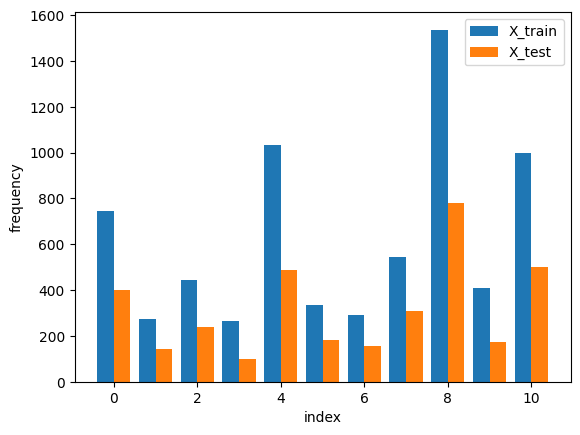

In [60]:
# (ACT15) using X_train and X_test
# plot frequency (number of times it appeared) of each word using index of words as x-axis
# using two subplots (bar plots) one for X_train and one for X_test
# you might find plt.bar useful

import matplotlib.pyplot as plt
x_labels = np.arange(d+1)
plt.bar(x_labels - 0.2, np.sum(X_train, axis=0), width=0.4, label='X_train')
plt.bar(x_labels + 0.2, np.sum(X_test, axis=0), width=0.4, label='X_test')
plt.xlabel('index')
plt.ylabel('frequency')
plt.legend()

